In [21]:
import warnings
warnings.filterwarnings("ignore")

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
import numpy as np

In [24]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [25]:
import random
import tqdm

In [26]:
"""
n_classes * n_clusters_per_class must be smaller or equal 2 ** n_informative

X, Y = make_classification(n_samples = 10000, n_features= 2, n_informative = 2,
                    n_redundant = 0, n_classes = 2, n_clusters_per_class = 1, random_state = 60
                   )
"""                   
X, Y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
print(type(X))
print(type(Y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [27]:
print(X.shape)
print(Y.size)

(10000, 2)
10000


In [28]:
print(X)

[[ 0.9944479  -1.51666697]
 [-0.3404792  -0.39546072]
 [-0.92978    -1.44854911]
 ...
 [-2.91953119 -1.96829635]
 [ 0.1717912  -1.53408936]
 [-2.54105874 -1.67856635]]


In [29]:
print(Y)

[0 1 1 ... 1 0 1]


##### stratify parameter
> This stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.

> For example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.

In [30]:
D_Train, D_test, Y_Train, Y_test = train_test_split(X, Y, stratify = Y, random_state = 42)

In [31]:
print(D_Train.shape)
print(type(D_Train))

(7500, 2)
<class 'numpy.ndarray'>


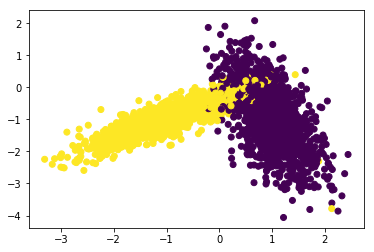

In [32]:
plt.scatter(D_test[:, 0], D_test[:, 1], c = Y_test)
plt.show()

### Custom GridSearchCV

In [33]:
len(D_Train)

7500

In [34]:
def randomly_select_k_percent_indices_in_range_from_0_to_len(D_Train_ref, pctng = 0.6):

    rand_sample = random.sample(range(0, len(D_Train_ref)), int(np.multiply(pctng, len(D_Train_ref))))

    return rand_sample

In [35]:
train_indices = randomly_select_k_percent_indices_in_range_from_0_to_len(D_Train, 0.7)
print(len(train_indices))
print(train_indices[:5])

5250
[1268, 5481, 7108, 6021, 3557]


In [36]:
cv_indices = list(set(range(0, len(D_Train))) - set(train_indices))
print(len(cv_indices))
print(cv_indices[:5])

2250
[0, 3, 5, 10, 12]


In [37]:
k_neighbors = [3,5,7,9,11,13,15,17,19,21,23]
folds = 3

In [38]:
clsfr = KNeighborsClassifier()

train_scores, cv_scores = list(), list()
for neighbor in k_neighbors:
    
    _train_scores_folds, _cv_scores_folds = list(), list()
    for fold in range(0, folds):
        
        d_train_indices = randomly_select_k_percent_indices_in_range_from_0_to_len(D_Train, 0.6)
        d_cv_indices = list(set(list(range(0, len(D_Train), 1))) - set(d_train_indices))
        
        d_train = D_Train[d_train_indices]
        y_train = Y_Train[d_train_indices]
        d_cv = D_Train[d_cv_indices]
        y_cv = Y_Train[d_cv_indices]
        
        clsfr.k_neighbors = neighbor
        clsfr.fit(d_train, y_train)
        
        y_hat = clsfr.predict(d_train)
        _train_score = accuracy_score(y_train, y_hat)
        _train_scores_folds.append(_train_score)
        
        y_cv_hat = clsfr.predict(d_cv)
        _cv_score = accuracy_score(y_cv, y_cv_hat)
        _cv_scores_folds.append(_cv_score)

    train_scores.append(np.mean(np.array(_train_scores_folds)))
    cv_scores.append(np.mean(np.array(_cv_scores_folds)))

In [39]:
print(train_scores)
print(cv_scores)

[0.9608148148148148, 0.961037037037037, 0.9618518518518518, 0.9629629629629629, 0.9634074074074075, 0.9614074074074074, 0.9615555555555555, 0.9608888888888889, 0.9608888888888889, 0.9640740740740741, 0.9631851851851851]
[0.9511111111111111, 0.952, 0.9517777777777777, 0.9483333333333333, 0.9501111111111111, 0.9505555555555555, 0.9504444444444444, 0.9512222222222221, 0.9504444444444444, 0.9502222222222222, 0.9511111111111111]


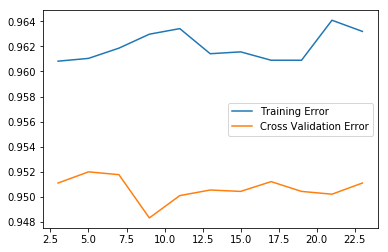

In [40]:
plt.plot(k_neighbors, train_scores, label="Training Error")
plt.plot(k_neighbors, cv_scores, label="Cross Validation Error")
plt.legend()
plt.show()